# Dow Jones Industrial Average
Data plus Reddit News:

*Mounting the data :*

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Imports :*

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import  MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Loading the data sets

In [103]:
#this is the dataset for the stock action of the Dow Jones IA
df = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/upload_DJIA_table.csv')
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


In [104]:
#This is the data set for the reddit news
df1 = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/RedditNews.csv')
df1

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...
73603,2008-06-08,b'Man goes berzerk in Akihabara and stabs ever...
73604,2008-06-08,b'Threat of world AIDS pandemic among heterose...
73605,2008-06-08,b'Angst in Ankara: Turkey Steers into a Danger...
73606,2008-06-08,"b""UK: Identity cards 'could be used to spy on ..."


#Merging data sets together: (New Dataframe DF3)

In [105]:
df3 = pd.merge(df, df1)

In [106]:
df3

,Date,Open,High,Low,Close,Volume,Adj Close,News
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,"The president of France says if Brexit won, so..."
3,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...,...,...,...,...,...,...
49713,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Why the Pentagon Thinks Attacking Iran is a ...
49714,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Caucasus in crisis: Georgia invades South Os...
49715,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Indian shoe manufactory - And again in a se...
49716,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Visitors Suffering from Mental Illnesses Ban...


Data exploring :

In [107]:
df3.head(55)

,Date,Open,High,Low,Close,Volume,Adj Close,News
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,"The president of France says if Brexit won, so..."
3,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,100+ Nobel laureates urge Greenpeace to stop o...
5,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,Brazil: Huge spike in number of police killing...
6,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,Austria's highest court annuls presidential el...
7,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,"Facebook wins privacy case, can track any Belg..."
8,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,Switzerland denies Muslim girls citizenship af...
9,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,China kills millions of innocent meditators fo...


In [108]:
df3["Date"]= df3["Date"].str.replace("-", "")

In [109]:
df3

,Date,Open,High,Low,Close,Volume,Adj Close,News
0,20160701,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,A 117-year-old woman in Mexico City finally re...
1,20160701,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,IMF chief backs Athens as permanent Olympic host
2,20160701,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,"The president of France says if Brexit won, so..."
3,20160701,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,British Man Who Must Give Police 24 Hours' Not...
4,20160701,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,100+ Nobel laureates urge Greenpeace to stop o...
...,...,...,...,...,...,...,...,...
49713,20080808,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Why the Pentagon Thinks Attacking Iran is a ...
49714,20080808,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Caucasus in crisis: Georgia invades South Os...
49715,20080808,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Indian shoe manufactory - And again in a se...
49716,20080808,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312,b'Visitors Suffering from Mental Illnesses Ban...


# Getting the average of all the columns to get an idea of the data :

In [110]:
df3['Open'].mean()

13459.508121146739

In [111]:
df3['High'].mean()

13541.697230387506

In [112]:
df3['Low'].mean()

13373.31487380397

In [113]:
df3['Close'].mean()

13463.417202607883

# Min and Max of the open column:

In [114]:
df3['Open'].min()

6547.009765999999

In [115]:
df3['Open'].max()

18315.060547

# Min and Max Of the close column:

In [116]:
df3['Close'].min()

6547.049805

In [117]:
df3['Close'].max()

18312.390625

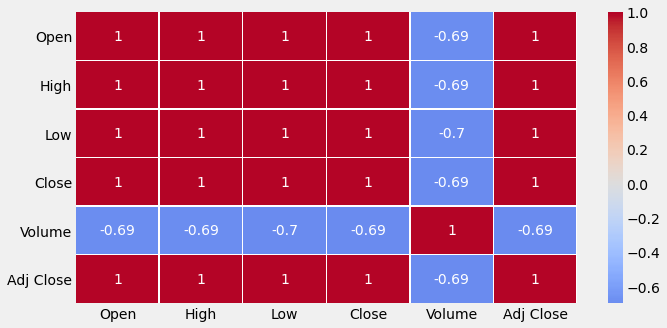

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

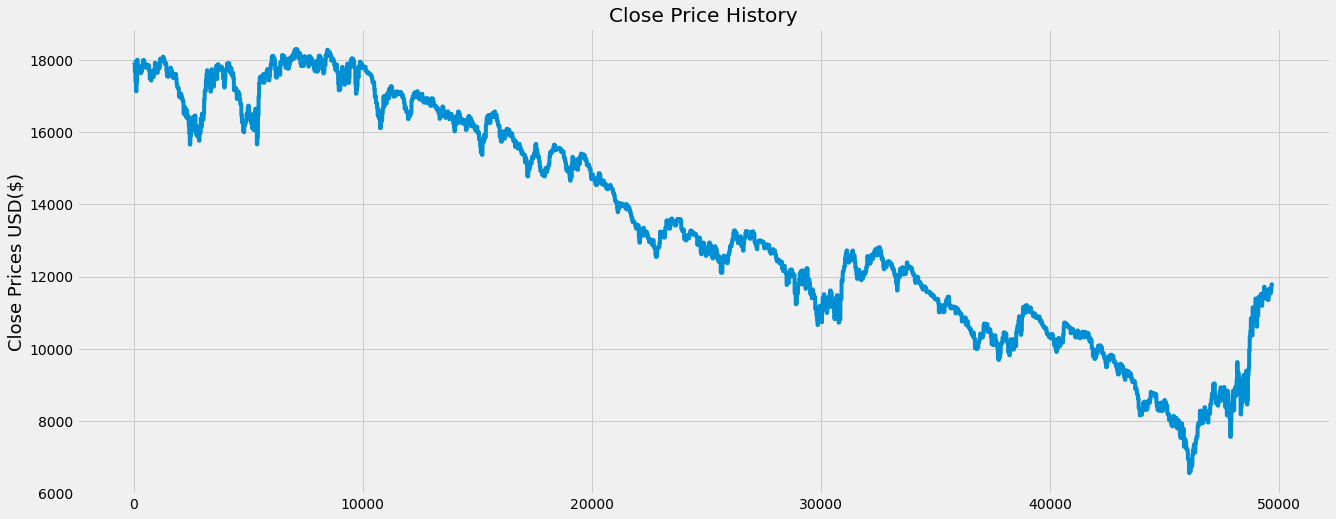

In [119]:
#V closing price
plt.figure(figsize=(20,8))
plt.title('Close Price History')
plt.plot(df3['Close'])
plt.ylabel('Close Prices USD($)', fontsize=18)
plt.show()

Machine learning :


In [120]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve
import seaborn as sns

In [121]:
# Arrange data into features matrix and target vector
X = df3.loc[:, ['Open',
           'High',
           'Low',
           'Volume']]
y = df3['Close']

In [122]:
X.shape


(49718, 4)

In [123]:
y.shape

(49718,)

In [124]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [125]:
# Standardize Data
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
#peaking at the data
print(X_train)

[[-1.08024232 -1.06592345 -1.09653081  2.93083485]
 [-0.81029335 -0.81690682 -0.86328105  0.85172166]
 [-0.86474961 -0.87092352 -0.85001045 -0.06006553]
 ...
 [ 0.10380701  0.12066136  0.13092716 -0.32209659]
 [-0.72056605 -0.72066674 -0.69314829 -0.07645578]
 [ 0.56441382  0.54574647  0.54435729 -0.6517108 ]]


In [127]:
#peaking at the data
print(X_test)

[[ 0.48087045  0.48373622  0.50713988 -0.48546689]
 [-0.7174946  -0.7404564  -0.76171767  1.07022278]
 [ 0.9350422   0.91432407  0.94379922 -0.94577733]
 ...
 [ 0.65900129  0.66799636  0.6735606  -0.18863317]
 [ 0.93919217  0.93130302  0.96225551 -0.88702788]
 [ 0.95141395  0.9438106   0.96614244 -0.46311655]]


# Deep Learning :

In [128]:
import math
#new data frame
data = df3.filter(['Close'])
#convert dataframe to numpy
dataset = data.values
#number of rows
training_data_len = math.ceil(len(dataset) * .8 )
training_data_len


39775

In [129]:
#scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.96914484],
       [0.96914484],
       [0.96914484],
       ...,
       [0.4408942 ],
       [0.4408942 ],
       [0.4408942 ]])

In [130]:
#create training dataset
#scaled training
train_data = scaled_data[0:training_data_len, :]
#split data
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96749772, 0.96749772, 0.96749772, 0.96749772, 0.96749772,
       0.96749772, 0.96749772, 0.96749772, 0.96749772, 0.96749772,
       0.96749772, 0.96749772, 0.96749772, 0.96749772, 0.96749772,
       0.96749772, 0.96749772, 0.96749772, 0.96749772, 0.96749772,
       0.96749772, 0.96749772, 0.96749772, 0.96749772, 0.96749772,
       0.9474974 , 0.9474974 , 0.9474974 , 0.9474974 , 0.9474974 ,
       0.9474974 , 0.9474974 , 0.9474974 , 0.9474974 , 0.9474974 ])]
[0.9474974039043605]

[array([0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.96914484, 0.96914484, 0.96914484,
       0.96914484, 0.96914484, 0.969

In [131]:
#conver x-y to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [132]:
#reshape x train needs to be 3d
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(39715, 60, 1)

In [133]:
#building model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [134]:
#compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [135]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

39715/39715 [==============================] - 938s 24ms/step - loss: 3.2940e-04


In [138]:

#create the testing data set
#create new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [139]:
#convert data to a numpy array
x_test = np.array(x_test)

In [140]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [141]:
#get model prediction 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [142]:
#get the root mean squared error
rmse = np.sqrt( np.mean(predictions - y_test)**2 )
rmse

39.83234427912222

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


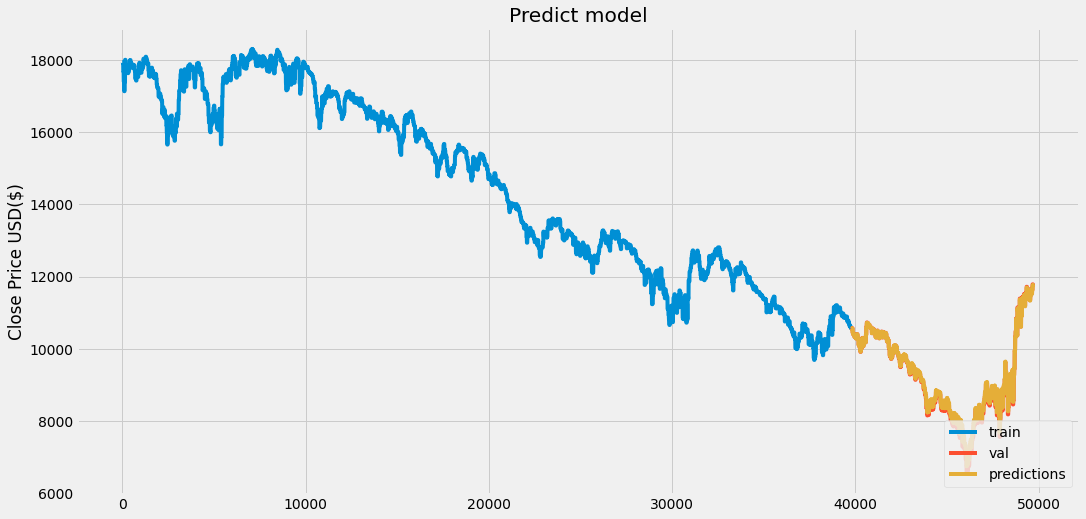

In [147]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
#visual
plt.figure(figsize=(16, 8));
plt.title('Predict model');
plt.ylabel('Close Price USD($)');
plt.plot(train['Close']);
plt.plot(valid[['Close', 'predictions']]);
plt.legend(['train', 'val', 'predictions'], loc='lower right');
plt.show();

In [144]:
#show valid and predicted price
valid

,Close,predictions
39775,10564.379883,10558.324219
39776,10564.379883,10558.204102
39777,10564.379883,10558.117188
39778,10564.379883,10558.082031
39779,10564.379883,10558.084961
...,...,...
49713,11734.320312,11715.500000
49714,11734.320312,11715.311523
49715,11734.320312,11715.165039
49716,11734.320312,11715.051758
